<a href="https://colab.research.google.com/github/Audrey-ai/KNN_and_Naive_Bayes_Classifier_Algorithms/blob/main/KNN_Classifier_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Defining the Question

###a) Specification of Data Analytical Question

The aim of this project is to implement a K-nearest neighbor (kNN) classifier to titanic dataset to predict whether a passenger survived or not based on a number of features.

###b) Determining the metric for success

The research will be considered a success if we are able to successfully implement a K-nearest neighbor (kNN) classifier to titanic dataset to come up with a model that predicts whether a passenger survived or not.

### c) Understanding the context

KNN is a non-parametric algorithm. Non-parametric means there is no assumption for underlying data distribution. In other words, the model structure determined from the dataset.


K Nearest Neighbor(KNN) is a very simple, easy to understand, versatile and one of the topmost machine learning algorithms and we will be using it in this titanic dataset to come with a model that predicts whether a passenger survived or not.

### d) Recording the Experimental Design

Experimental design refers to how participants are allocated to the different conditions in a reaserch or experiment.
The experimental design used is **Independent measures design**, also known as between-groups,which is an experimental design where different participants are used in each condition of the independent variable.  This means that each condition of the experiment includes a different group of participants.

###e) Data Relevance

The datasets we are using in our research are relevant as it contains information pertaining to different passengers on the titanic that would generally influence the survival of the passengers.In general the variables selected for the dataset present a high degree of data relevance.

#2. Reading and Checking of data

In [74]:
#Importing relevant libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

In [75]:
#Loading the training dataset that we will use in our research
#

Survival = pd.read_csv('train.csv')
Survival.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [76]:
#Loading the test dataset that we will be predicting later whether a passenger survived based on that set
#

Survival_Test = pd.read_csv('test.csv')
Survival_Test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [77]:
#Checking the shape of the dataset
#

Survival.shape

(891, 12)

In [78]:
#Checking Column info
#

Survival.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [79]:
#Checking number of unique values per column
#

Survival.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

#3.Data Cleaning

#3.a) Cleaning the Train dataset that we will use in our research

In [80]:
#Dropping irrelevant columns in our training and research data

Survival.drop(['PassengerId','Name','Ticket','Cabin'], axis=1, inplace=True)
Survival.head(4)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S


In [81]:
#Checking for missing values
#

Survival.isnull().sum()

#There are missing values in the embarked and age columns that we will deal with

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [82]:
#Checking what is missing in embarked column
#

Survival[Survival['Embarked'].isnull()]  #We can forward fill the missing two values 

#Filling in the missing values in the embarked column of training dataset
Survival['Embarked'].fillna(method='ffill', inplace=True)

#Checking if there are any more missing values in the embarked column
Survival['Embarked'].isnull().any()   


#There are no more missing values

False

In [83]:
#Dealing with missing values in the age column
#
#Finding the mean age per survival group 
Survival[['Age','Survived']].groupby(['Survived']).Age.mean()  #0-Mean age:30.63=31 , 1-Mean age:28.34=28

#The two conditions of surviving and not surviving
S = Survival.Survived==0
NS = Survival.Survived==1

#Filling the missing values with th emean for the two classes
Survival.loc[S, 'Age'] = Survival.loc[S, 'Age'].fillna(31)
Survival.loc[NS, 'Age'] = Survival.loc[NS, 'Age'].fillna(28)


In [84]:
#Checking for any missing values
#
Survival.isnull().sum()  #There are no missing values

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [85]:
#Checking for duplicates
#

Survival.duplicated().any().sum()  #There are duplicate records that we will drop

#Dropping duplicates
Survival.drop_duplicates(inplace=True)

#Checking if there are any more duplicates
Survival.duplicated().any()

False

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


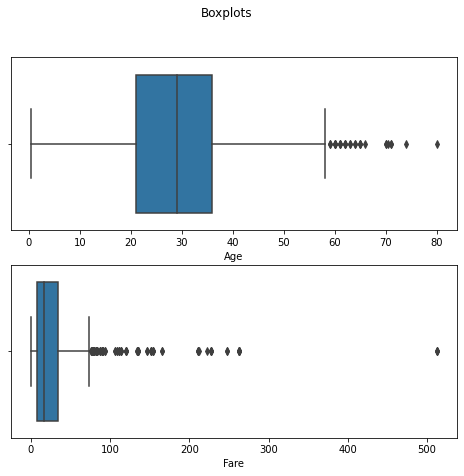

In [86]:
#Checking for Outliers and Anomalies
#

variables = ['Age', 'Fare']

fig, ax = plt.subplots(len(variables), figsize=(8,7))
fig.suptitle('Boxplots')

for i,col_val in enumerate(variables):
  sns.boxplot(Survival[col_val],ax=ax[i])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


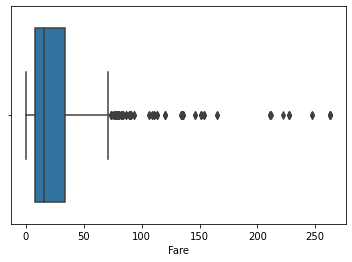

In [87]:
#For the fare category there is a major outlier that has a wide range 
#compared to the rest of the data that we will drop 

Outlier = Survival[Survival['Fare'] > 300] #There are 3 observations falling in this category we will drop
Outlier

#Dropping the 3  outliers
Survival.drop(Outlier.index,inplace=True)

#Plotting boxplot to check that the outliers have been dropped
sns.boxplot(Survival['Fare'])


#From the boxplot below we can see extreme values no longer exist

#3.b)Cleaning the test data that we will use our model to predict the chance of survival for this data

In [88]:
#Displaying the data
#
Survival_Test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [89]:
#Dropping irrelevant columns in our training and research data

Survival_Test.drop(['PassengerId','Name','Ticket','Cabin'], axis=1, inplace=True)
Survival_Test.head(4)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S


In [90]:
#Checking for missing values
#

Survival_Test.isnull().sum()


Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [91]:
#Dealing with missing values in the fare column

Survival_Test['Fare'].fillna(method='ffill', inplace=True)

Survival_Test['Fare'].isnull().sum()   


0

In [92]:
#Dealing with missing values in the age column
#
#Finding the mean age of dataset
Survival_Test['Age'].mean()  #Mean Age is 30.27=30

#Filling the missing values with the mean for the two classes
Survival_Test['Age'] = Survival_Test['Age'].fillna(30)

In [93]:
#Checking if there are any more missing values
#

Survival_Test.isnull().sum() 

#There is no more missing data

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

#4.Exploratory Data Analysis

#4.a)Univariate data analysis

In [94]:
#Creating frequency tables for categorical columns

variables = ['Survived','Pclass','Sex','SibSp','Parch','Embarked']
             

for variable in variables:
 print(variable)
 print(Survival[variable].value_counts())

#Some of the things we notice from the below frequency tables are:
#1.Most passengers did not survive
#2.Most passengers were male

Survived
0    456
1    317
Name: Survived, dtype: int64
Pclass
3    402
1    207
2    164
Name: Pclass, dtype: int64
Sex
male      482
female    291
Name: Sex, dtype: int64
SibSp
0    506
1    201
2     27
4     18
3     14
5      5
8      2
Name: SibSp, dtype: int64
Parch
0    570
1    113
2     75
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
Embarked
S    562
C    153
Q     58
Name: Embarked, dtype: int64


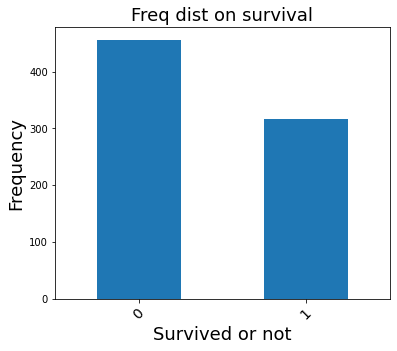

In [95]:
#Displaying whether or not the passenger survived
#
#Bar plot on survival status

Survival['Survived'].value_counts().plot.bar(figsize=(6,5),grid=False)

plt.title('Freq dist on survival',size=18)
plt.xlabel('Survived or not',size=18)
plt.xticks(fontsize=14,rotation=45)
plt.ylabel('Frequency',size=18)
plt.show()


#From the plot below you can see most passengers did not survive

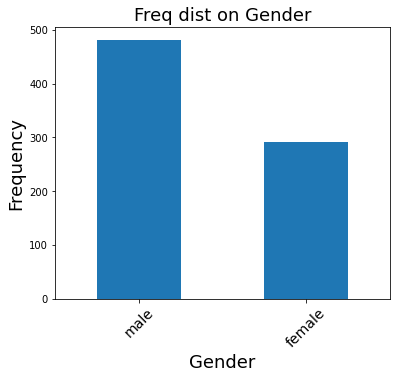

In [96]:
#Displaying the gender of the passengers 
#
#Bar plot on gender

Survival['Sex'].value_counts().plot.bar(figsize=(6,5),grid=False)

plt.title('Freq dist on Gender',size=18)
plt.xlabel('Gender',size=18)
plt.xticks(fontsize=14,rotation=45)
plt.ylabel('Frequency',size=18)
plt.show()


#From the plot below you can see most passengers were male

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution on age')

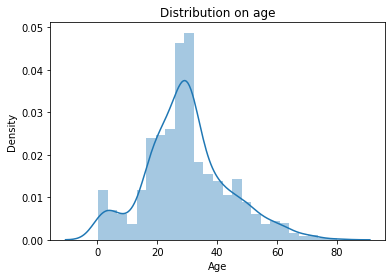

In [97]:
#Checking the age distribution
#
#Plotting the distribution

sns.distplot(Survival['Age'])
plt.title('Distribution on age')


#Majority of the respondents is between 25 to 35 years
#The distribution appears normal and is skewed to the right

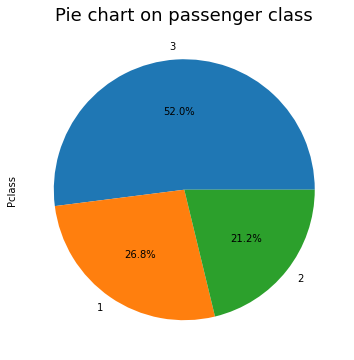

In [98]:
#Pie chart on passenger class for the passengers
#

Survival['Pclass'].value_counts().plot.pie(figsize=(7,6),autopct='%1.1f%%')

plt.title('Pie chart on passenger class',size=18)
plt.show()

#we can notice that  most of the passengers were in the third class

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Fare')

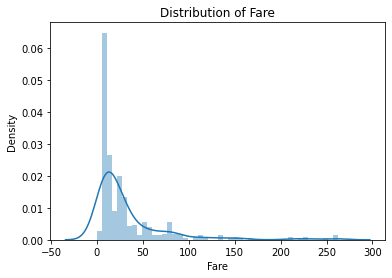

In [99]:
#Checking the age distribution
#
#Plotting the distribution

sns.distplot(Survival['Fare'])
plt.title('Distribution of Fare')


#The distribution appears normal and is skewed to the right

In [100]:
#Descriptive statistics of continuous variables
#

Survival[['Age','Fare']].describe()

,Age,Fare
count,773.000000,773.00000
mean,29.801320,33.05581
std,13.776397,43.18638
min,0.420000,0.00000
25%,21.000000,8.05000
50%,29.000000,15.90000
75%,36.000000,33.50000
max,80.000000,263.00000


#4.b)Bivariate data analysis

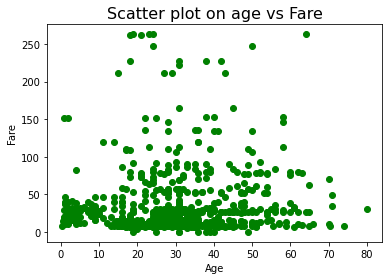

In [101]:
##Scatter plot to check the relationship between various variables

#Scatter plot to check on relation between age and survival
plt.scatter(Survival['Age'],Survival['Fare'], color='Green')
plt.title('Scatter plot on age vs Fare',size=16)
plt.xlabel('Age',size=10)
plt.ylabel('Fare',size=10)
plt.show()

#There is no visible relationship between age and fare

In [102]:
#Checking correlation among our continuous variables
#

Survival[['Age','Fare']].corr()

#there is very slight to no correlation among Age and Fare

,Age,Fare
Age,1.000000,0.091088
Fare,0.091088,1.000000


Text(0, 0.5, 'Number')

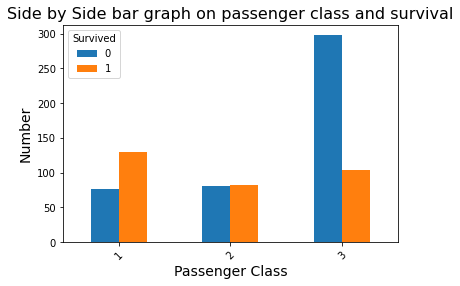

In [104]:
#Side by side bar graph on Passenger class and survival

#First grouping the dataframe by the two variables
Survival.groupby(['Pclass','Survived']).count()
Survival.groupby(['Pclass','Survived']).Age.count().unstack()

#Plotting our bar graph 
Survival.groupby(['Pclass','Survived']).Age.count().unstack().plot(kind='bar',grid=False)

# labels and title
plt.title('Side by Side bar graph on passenger class and survival',fontsize=16)
plt.xlabel('Passenger Class',fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Number',fontsize=14)


#We notice most passengers in third class have less chance of survival compared to first class
#In second class there is a close balance between a passenger surviving and not surviving

Text(0, 0.5, 'Number')

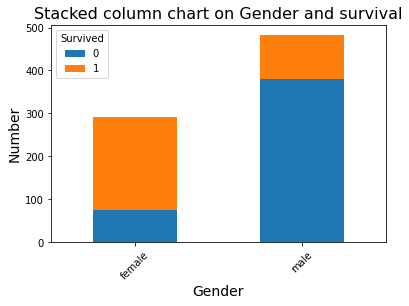

In [105]:
#Stacked column chart on Gender and survival

#First grouping the dataframe by the two variables
Survival.groupby(['Sex','Survived']).count()
Survival.groupby(['Sex','Survived']).Age.count().unstack()

#Plotting our stacked column chart
Survival.groupby(['Sex','Survived']).Age.count().unstack().plot(kind='bar',stacked=True,grid=False)

# labels and title
plt.title('Stacked column chart on Gender and survival',fontsize=16)
plt.xlabel('Gender',fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Number',fontsize=14)


#We notice most female passengers are likely to survive as compared to male passengers


#4.c)Multivariate data analysis

Text(0.5, 1.0, 'Scatter plot on Age and fare by survival status')

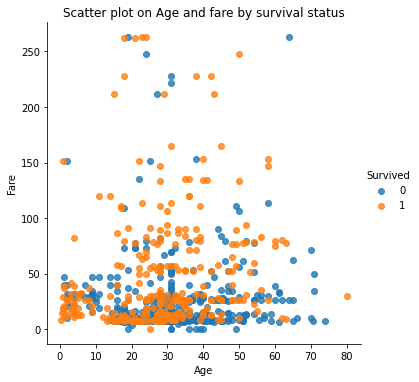

In [106]:
##Scatter plot to check the relationship between age and fare by survival status

import seaborn as sns

sns.lmplot(x='Age', y='Fare', hue='Survived',data=Survival,fit_reg=False)
plt.title('Scatter plot on Age and fare by survival status')

###**Encoding our categorical variables**

In [107]:
#Encoding our categorical columns

#First importing and instantiating labelencoder
#First importing  labelencoder
from sklearn.preprocessing import LabelEncoder

# instantiate labelencoder object
le = LabelEncoder()

#Encoding our categorical columns
#

#Categorical boolean mask
categorical_feature_mask = Survival.dtypes==object

#Filter categorical columns using mask and turn it into a list
categorical_columns = Survival.columns[categorical_feature_mask].tolist()

#Apply le on categorical feature columns
Survival[categorical_columns] = Survival[categorical_columns].apply(lambda col:le.fit_transform(col))
Survival[categorical_columns].head()


,Sex,Embarked
0,1,2
1,0,0
2,0,2
3,0,2
4,1,2


In [108]:
#Cross checking our dataset
#
print(Survival.shape)
Survival.head()

(773, 8)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


###**Linear Discriminant Analysis(LDA)**

In [ ]:
#Dividing the dataset into features and label
X = Survival.drop(['Survived'],axis=1)
y = Survival['Survived']
print(X)
print(y)

In [110]:
#Dividing dataset into train and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [111]:
#Feature Scaling
#

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [112]:
#Performing LDA with two components
#

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(7, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


Since we have applied LDA on our data to reduce number of features to two components we can now proceed to implementing the KNN Algorithm. 

#5.Implementing the solution

#5.a) Solution Implementation with reduced Features using LDA 

###**KNN Algorithm using 80-20 sets**

The dataset we reduced using LDA had an 80-20 split thus we will just proceed to implementing the suolution using 80-20 sets.

In [113]:
#Training our algorithm
#

from sklearn.neighbors import KNeighborsClassifier

classifier1 = KNeighborsClassifier(n_neighbors=5)
classifier1.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [114]:
#Making predictions
#
 
y_pred1 = classifier1.predict(X_test)
y_pred1

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0])

In [115]:
#Checking model performance
#

from sklearn.metrics import confusion_matrix,accuracy_score

print( accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))

0.7354838709677419
[[65 20]
 [21 49]]


While implementing the KNN using 80-20 sets we attain a prediction accuracy of 73.55% which is not so bad. We will proceed to using two more sets that is 70-30 and 60-40 to see how this affects the performance of our model. 

###**KNN Algorithm using 70-30 sets**

In [116]:
#Dividing dataset into train and test sets


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [117]:
#Feature Scaling
#


sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [118]:
#Performing LDA with two components
#

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(7, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


In [119]:
#Training our algorithm
#

classifier2 = KNeighborsClassifier(n_neighbors=5)
classifier2.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [120]:
#Making predictions
#
 
y_pred2 = classifier2.predict(X_test)
y_pred2

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0])

In [121]:
#Checking model performance
#

print( accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))

0.7931034482758621
[[109  19]
 [ 29  75]]


With a 70-30 set we attain an accuracy of 79.31% which is better than that of 80-20 set.Lets use the 60-40 sets to still get a clear picture of how the model performs.

###**KNN algorithm using 60-40 sets**

In [122]:
#Dividing dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [123]:
#Feature Scaling
#

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [124]:
#Performing LDA with two components
#

lda = LDA(n_components=2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(7, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


In [125]:
#Training our algorithm
#

classifier3 = KNeighborsClassifier(n_neighbors=5)
classifier3.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [126]:
#Making predictions
#
 
y_pred3 = classifier3.predict(X_test)
y_pred3

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,

In [127]:
#Checking model performance
#

print( accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))

0.7741935483870968
[[159  23]
 [ 47  81]]


With the 60-40 sets we do notice an accuracy of 77.42% which is better than the 80-20 sets but this is a drop in accuracy compared to the 70-30 sets.

#5.b)Solution Implementation with all features of the dataset Inclusive

###**KNN algorithm using 80-20 sets**

In [128]:
#Dividing the dataset into features and label
X = Survival.drop(['Survived'],axis=1)
y = Survival['Survived']

In [129]:
#Dividing dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [130]:
#Feature Scaling
#

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [131]:
#Training our algorithm
#

classifier1 = KNeighborsClassifier(n_neighbors=5)
classifier1.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [132]:
#Making predictions
#
 
y_pred11 = classifier1.predict(X_test)
y_pred11

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1])

In [133]:
#Checking model performance
#

print( accuracy_score(y_test, y_pred11))
print(confusion_matrix(y_test, y_pred11))

0.7290322580645161
[[62 23]
 [19 51]]


While implementing the KNN using 80-20 sets we attain a prediction accuracy of 72.90% which is not so bad. We will proceed to using two more sets that is 70-30 and 60-40 to see how this affects the performance of our model.

###**KNN algorithm using 70-30 sets**

In [134]:
#Dividing dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [135]:
#Feature Scaling
#

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [136]:
#Training our algorithm
#

classifier1 = KNeighborsClassifier(n_neighbors=5)
classifier1.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [137]:
#Making predictions
#
 
y_pred22 = classifier1.predict(X_test)
y_pred22

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0])

In [138]:
#Checking model performance
#

print( accuracy_score(y_test, y_pred22))
print(confusion_matrix(y_test, y_pred22))

0.75
[[99 29]
 [29 75]]


With a 70-30 set we attain an accuracy of 75% which is better than that of 80-20 set.Lets use the 60-40 sets to still get a clear picture of how the model performs.

###**KNN algorithm using 60-40 sets**

In [139]:
#Dividing dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [140]:
#Feature Scaling
#

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [141]:
#Training our algorithm
#

classifier1 = KNeighborsClassifier(n_neighbors=5)
classifier1.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [142]:
#Making predictions
#
 
y_pred33 = classifier1.predict(X_test)
y_pred33

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,

In [143]:
#Checking model performance
#

print( accuracy_score(y_test, y_pred33))
print(confusion_matrix(y_test, y_pred33))

0.7580645161290323
[[149  33]
 [ 42  86]]


With a 70-30 set we attain an accuracy of 75.81% which is better than that of 80-20 and 70-30 sets but higher than 70-30 sets by a very small margin.

#Conclusion based on using different sets

We were able to implement the KNN algorithm using different sets that is 80-20,70-30 and 60-40 sets that gave an accuracy of 73.55%,79.31% and 77.42% respectively with a reduced number of features by PCA.

While using all features we see a reduction in model accuracy with 80-20,70-30 and 60-40 sets having 72.90%,75% and 75.81% accuracies respectively.


It is quite evident that different levels of split on our data do lead to different performance of the  model and for our case the 70-30 sets gave a high accuracy of 79.31% with reduced features and 60-40 has a slight better performance when using all features. 

#Making Predictions on our test data

In [144]:
#First crosschecking the test data we had already cleaned
#
Survival_Test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [145]:
#Encoding our categorical columns

#First importing and instantiating labelencoder
#First importing  labelencoder
from sklearn.preprocessing import LabelEncoder

# instantiate labelencoder object
le = LabelEncoder()

#Encoding our categorical columns
#

#Categorical boolean mask
categorical_feature_mask = Survival_Test.dtypes==object

#Filter categorical columns using mask and turn it into a list
categorical_columns = Survival_Test.columns[categorical_feature_mask].tolist()

#Apply le on categorical feature columns
Survival_Test[categorical_columns] = Survival_Test[categorical_columns].apply(lambda col:le.fit_transform(col))
Survival_Test[categorical_columns].head()

,Sex,Embarked
0,1,1
1,0,2
2,1,1
3,1,2
4,0,2


In [146]:
#Cross checking our dataset
#
print(Survival_Test.shape)
Survival_Test.head()

(418, 7)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


In [170]:
#Mkaing predictions based on KNN 80-20 sets that had reduced features
#

y_predTest = classifier1.predict(Survival_Test.values)
y_predTest

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,

#Challenging the solution

The reaserch was a success as we could be able to implement a K-nearest neighbor (kNN) classifier to titanic dataset to come up with a model that predicts whether a passenger survived or not.However the results could be improved if we had more features that could help us predict the results.

Otherwise we can note the below:


1.The data we used for our research was appropriate to achieve the results.


2.The reaserch was a success as we were able to implement a K-nearest neighbor (kNN) classifier to titanic dataset to come up with a model that predicts whether a passenger survived or not.